In [3]:
import numpy as np
import networkx as nx
import matplotlib
import parse

In [108]:
"""Python implementation of basic HCS
Implementation of Highly Connected Subgraphs (HCS) clustering which is introduced by "Hartuv, E., & Shamir, R. (2000).
 A clustering algorithm based on graph connectivity. Information processing letters, 76(4-6), 175-18"
 
Based on NetworkX and Numpy
Notation:
    G = Graph
    E = Edge
    V = Vertex
    
    |V| = Number of Vertices in G
    |E| = Number of Edges in G
"""


def create_example_graph():
    """Create example graph used in the paper
    :return: NetworkX Graph
    """

    v = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'X': 9, 'Y': 10, 'Z': 11}

    adjacency = np.zeros(shape=(12, 12), dtype=np.uint8)
    adjacency[v['A'], [v['B'], v['C'], v['D']]] = 1
    adjacency[v['B'], [v['A'], v['D'], v['E'], v['Y']]] = 1
    adjacency[v['C'], [v['A'], v['D'], v['E']]] = 1
    adjacency[v['D'], [v['A'], v['B'], v['C'], v['E']]] = 1
    adjacency[v['E'], [v['B'], v['C'], v['D'], v['F']]] = 1
    adjacency[v['F'], [v['E'], v['Y'], v['G'], v['I'], v['H']]] = 1
    adjacency[v['G'], [v['Z'], v['F'], v['I'], v['H']]] = 1
    adjacency[v['H'], [v['F'], v['G'], v['I']]] = 1
    adjacency[v['I'], [v['H'], v['F'], v['G']]] = 1
    adjacency[v['X'], [v['Y'], v['Z']]] = 1
    adjacency[v['Y'], [v['B'], v['X'], v['Z'], v['F']]] = 1
    adjacency[v['Z'], [v['X'], v['Y'], v['G']]] = 1

    return nx.from_numpy_matrix(adjacency)


def highly_connected(G, E):
    """Checks if the graph G is highly connected
    Highly connected means, that splitting the graph G into subgraphs needs more than 0.5*|V| edge deletions
    This definition can be found in Section 2 of the publication.
    :param G: Graph G
    :param E: Edges needed for splitting G
    :return: True if G is highly connected, otherwise False
    """

    return len(E) > len(G.nodes) / 15


def remove_edges(G, E):
    """Removes all edges E from G
    Iterates over all edges in E and removes them from G
    :param G: Graph to remove edges from
    :param E: One or multiple Edges
    :return: Graph with edges removed
    """

    for edge in E:
        G.remove_edge(*edge)
    return G


def HCS(G):
    """Basic HCS Algorithm
    cluster labels, removed edges are stored in global variables
    :param G: Input graph
    :return: Either the input Graph if it is highly connected, otherwise a Graph composed of
    Subgraphs that build clusters
    """

    E = nx.algorithms.connectivity.cuts.minimum_edge_cut(G)
    #print(highly_connected(G, E))

    if not highly_connected(G, E):
        G = remove_edges(G, E)
        sub_graphs = [G.subgraph(c).copy() for c in nx.connected_components(G)]

        if len(sub_graphs) == 2:
            H = HCS(sub_graphs[0])
            _H = HCS(sub_graphs[1])

            G = nx.compose(H, _H)

    return G


def improved_HCS(G):
    """
    Implements improvements mentioned in the paper
    1. Iterated HCS
    2. Singleton adoption
    3. Removing Low Degree Vertices
    """
    pass


def labelled_HCS(G):
    """
    Runs basic HCS and returns Cluster Labels
    :param G: Input graph
    :return: List of cluster assignments for the single vertices
    """

    _G = HCS(G)

    sub_graphs = (G.subgraph(c).copy() for c in nx.connected_components(_G))


    labels = np.zeros(shape=(len(G)), dtype=np.uint16)

    for _class, _cluster in enumerate(sub_graphs, 1):
        c = list(_cluster.nodes)
        labels[c] = _class

    return labels

2.303030303030303


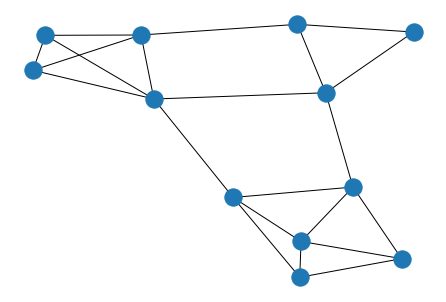

In [109]:
G = create_example_graph()
print(nx.average_node_connectivity(G))
nx.draw(G)

2.303030303030303


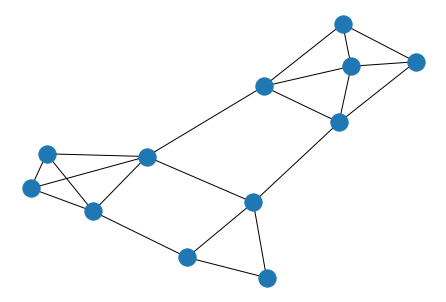

In [110]:
hcsG = HCS(G)
nx.draw(hcsG)
print(nx.average_node_connectivity(hcsG))

In [111]:
#A = np.eye(4)
#G = nx.convert_matrix.from_numpy_array(A)

In [112]:
#A

In [113]:
#nx.draw(G)

In [58]:
smallGraph = parse.read_input_file('C://Users//adith//Documents//cs170//170project//our_graphs//25.in')
medGraph = parse.read_input_file('C://Users//adith//Documents//cs170//170project//our_graphs//50.in')
largeGraph = parse.read_input_file('C://Users//adith//Documents//cs170//170project//our_graphs//100.in')



In [59]:
print(nx.average_node_connectivity(smallGraph))
print(nx.average_node_connectivity(medGraph))
#print(nx.average_node_connectivity(largeGraph))
#print(nx.average_node_connectivity(G))

3.3833333333333333
4.781224489795918
7.702424242424242
0.0


2

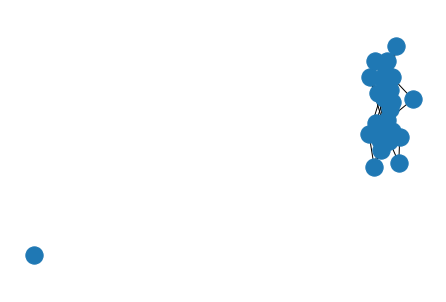

In [114]:

smallGraph = parse.read_input_file('C://Users//adith//Documents//cs170//170project//our_graphs//25.in')
copyS = parse.read_input_file('C://Users//adith//Documents//cs170//170project//our_graphs//25.in')
#nx.draw(smallGraph)
convertedSmallGraph = HCS(smallGraph)
labels = labelled_HCS(copyS)
nx.draw(convertedSmallGraph)
len(np.unique(np.array(labels)))

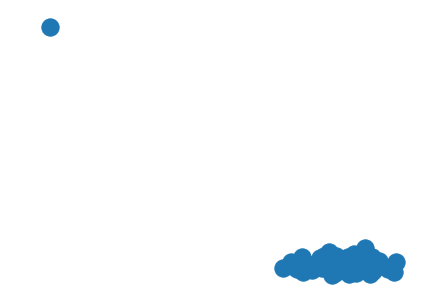

In [115]:
nx.draw(medGraph)

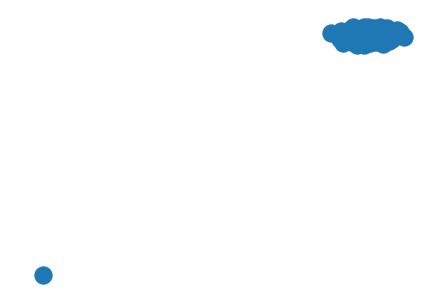

In [116]:
nx.draw(largeGraph)

7

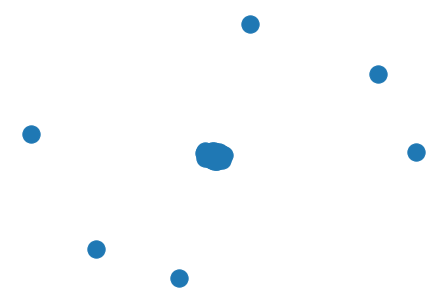

In [117]:
medGraph = parse.read_input_file('C://Users//adith//Documents//cs170//170project//our_graphs//50.in')
copyM = parse.read_input_file('C://Users//adith//Documents//cs170//170project//our_graphs//50.in')

convertedMedGraph = HCS(medGraph)
labels = labelled_HCS(copyM)
nx.draw(convertedMedGraph)
len(np.unique(np.array(labels)))

15

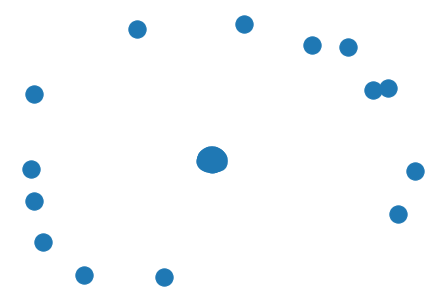

In [118]:
largeGraph = parse.read_input_file('C://Users//adith//Documents//cs170//170project//our_graphs//100.in')
copyL = parse.read_input_file('C://Users//adith//Documents//cs170//170project//our_graphs//100.in')

convertedLargeGraph = HCS(largeGraph)
labels = labelled_HCS(copyL)
nx.draw(convertedLargeGraph)
len(np.unique(np.array(labels)))